## What does America think about the Star Wars Episodes?

In order to answer this question, the team at FiveThirtyEight surveyed Star Wars fans generating 835 responses.  The responses are saved in the StarWars.csv file which can be downloaded from https://github.com/fivethirtyeight/data/tree/master/star-wars-survey.  

### 1) Exploring the dataset and cleaning the data:

In [127]:
import pandas as pd
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_colwidth', -1)
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Retur

Observations:

1)All unnamed column names are actually their corresponding values in the first row. <br\>
2)There are NaN values for some rows in Respondent ID column and hence these rows needs to be removed.

In [128]:
#Renaming the columns corresponding to which episode have you seen:
replacing_cols = {}
cols = ['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8']
count = 1
for x in cols:
    replacing_cols[x] = 'Watched_episode_{}'.format(count)
    count += 1
    
star_wars = star_wars.rename(replacing_cols, axis='columns')

#Renaming the columns corresponding to ranking the star wars films:
replacing_cols1 = {}
cols1 = ['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14']
count=1
for x in cols1:
    replacing_cols1[x] = 'rank_episode_{}'.format(count)
    count += 1

star_wars = star_wars.rename(replacing_cols1, axis='columns')

#Renaming the columns corresponding to rating the characters:
replacing_cols2 = {}
cols2 = ['Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28',]
characters = star_wars.iloc[0, 15:29].tolist()
 
countx = 0
county = 0

for x in cols2:
    countx += 1
    county = 0
    for y in characters:
        county+=1
        if countx == county:
            replacing_cols2[x] = y
            
star_wars = star_wars.rename(replacing_cols2, axis='columns')
            
#Removing the rows that have NaN value for Respondent ID:
star_wars = star_wars.loc[star_wars['RespondentID'].notnull()]
star_wars.columns = star_wars.columns.str.strip()

print(star_wars.columns)
star_wars.head(10)

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Watched_episode_1', 'Watched_episode_2', 'Watched_episode_3',
       'Watched_episode_4', 'Watched_episode_5', 'Watched_episode_6',
       'rank_episode_1', 'rank_episode_2', 'rank_episode_3', 'rank_episode_4',
       'rank_episode_5', 'rank_episode_6', 'Han Solo', 'Luke Skywalker',
       'Princess Leia Organa', 'Anakin Skywalker', 'Obi Wan Kenobi',
       'Emperor Palpatine', 'Darth Vader', 'Lando Calrissian', 'Boba Fett',
       'C-3P0', 'R2 D2', 'Jar Jar Binks', 'Padme Amidala', 'Yoda',
       'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Ce

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Watched_episode_1,Watched_episode_2,Watched_episode_3,Watched_episode_4,Watched_episode_5,Watched_episode_6,rank_episode_1,rank_episode_2,rank_episode_3,rank_episode_4,rank_episode_5,rank_episode_6,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,4,3,6,5,2,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Neither favorably nor unfavorably (neutral),Very favorably,Neither favorably nor unfavorably (neutral),Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Han,Yes,N

1) For the "Have you seen any of the 6 films in the Star Wars franchise?" & "Do you consider yourself to be a fan of the Star Wars film franchise?" columns,the values are "Yes", "No" or "NaN" if the person taking the survey chooses not to answer.  We want to convert these into boolen values i.e True/False/NaN.  

2) Similarly, we want to convert the watched_episodex columns into boolean ones: True/False

3) For the rank_episodex columns, we want to convert the values into float if they are not already in numeric format.

In [129]:
#Addressing num 1, Converting the columns into boolean values:
bool_cols = ["Have you seen any of the 6 films in the Star Wars franchise?", "Do you consider yourself to be a fan of the Star Wars film franchise?"]
for x in bool_cols:
    star_wars.loc[star_wars[x]=="Yes", x] = True
    star_wars.loc[star_wars[x]=="No", x] = False

#Addressing num 2, Converting the watched_episodex columns into bool values:
count = 0
for x in range(6):
    count += 1
    star_wars.loc[star_wars["Watched_episode_{}".format(count)].notnull(), "Watched_episode_{}".format(count)] = True
    star_wars.loc[star_wars["Watched_episode_{}".format(count)].isnull(), "Watched_episode_{}".format(count)] = False

#Addressing num 3, Converting rank_episodex columns into numeric values:
star_wars.iloc[:,9:15]= star_wars.iloc[:,9:15].apply(pd.to_numeric)
    
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Watched_episode_1,Watched_episode_2,Watched_episode_3,Watched_episode_4,Watched_episode_5,Watched_episode_6,rank_episode_1,rank_episode_2,rank_episode_3,rank_episode_4,rank_episode_5,rank_episode_6,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


### 2) Determining highest-ranked episode

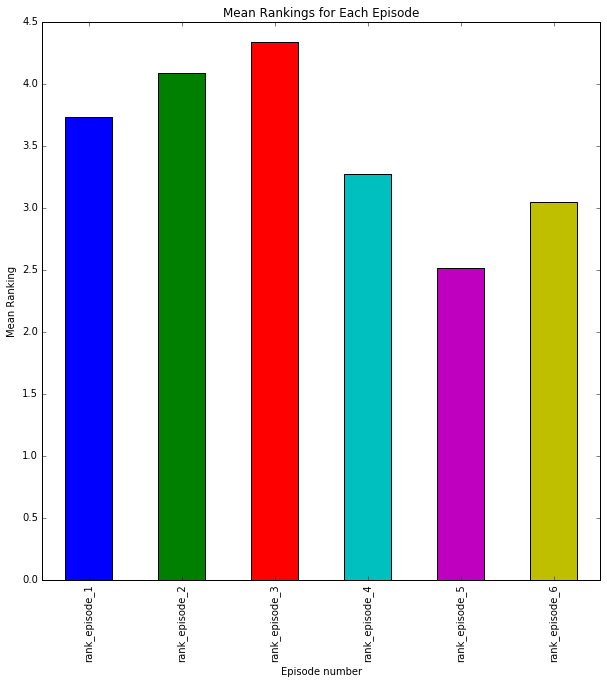

In [130]:
import matplotlib.pyplot as plt
%matplotlib inline

#Obtaining the mean of each ranking column:
ranking_mean = star_wars.iloc[:,9:15].mean()
ranking_mean.plot.bar(title = 'Mean Rankings for Each Episode', figsize = (10,10))
plt.xlabel('Episode number')
plt.ylabel('Mean Ranking')

It appears that the favourite episode amongst the survey respondants is episode 5.  We see that episodes 4, 5 & 6(original episodes) are ranked better than episodes 1, 2 & 3.  This could be because Star Wars was a hit during its time in the past and hence people remember the movie to be very good.  

### 3) Determining how many survey respondents watched each episode

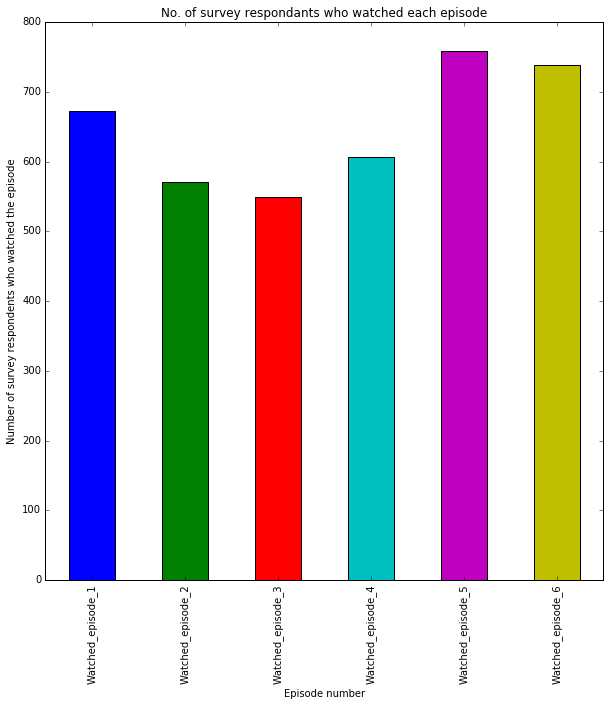

In [131]:
watched_sum = star_wars.iloc[:,3:9].sum()
watched_sum.plot.bar(title = 'No. of survey respondants who watched each episode', figsize = (10,10))
plt.xlabel('Episode number')
plt.ylabel('Number of survey respondents who watched the episode')

The last 3 episodes were watched more times than the first 3 episodes hence further confirming the theory that the last 3 episodes were better rated as they were more popular in the past.

### 4) Determining if being a star wars fan affects the ratings and the episodes watched

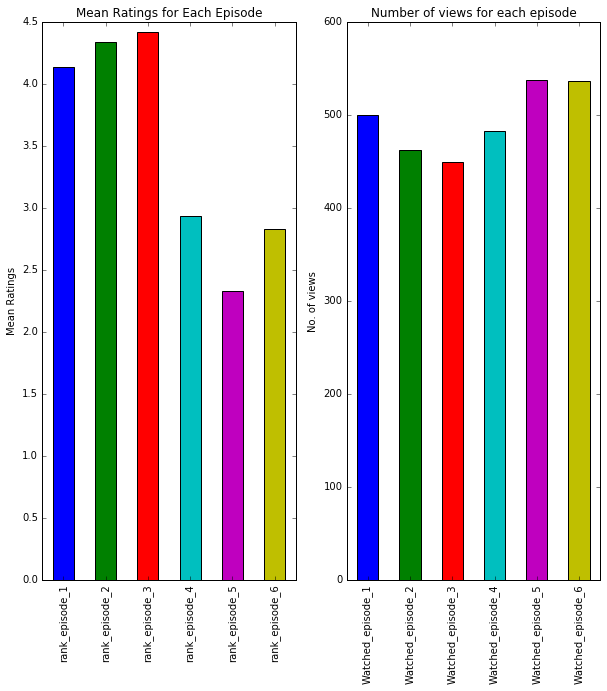

In [132]:
star_wars_fans = star_wars.loc[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?']==True]

fig = plt.figure()
ax = fig.add_subplot(1,2,1)
ax = star_wars_fans.iloc[:, 9:15].mean().plot.bar(figsize=(10,10))
ax.set_title('Mean Ratings for Each Episode')
ax.yaxis.set_label_text('Mean Ratings')

ax = fig.add_subplot(1,2,2)
ax = star_wars_fans.iloc[:, 3:9].sum().plot.bar(figsize=(10,10))
ax.set_title('Number of views for each episode')
ax.yaxis.set_label_text('No. of views')

The best ranked episode is still episode 5 and the original episodes are still ranked better than the latest 3 episodes but the disparity is more evident here.  Hence, the lower rankings for latest star wars as opposed to the original movies is mostly owing to Star Wars Fans.

The trend for number of views for survey respondents who were star wars fans was very similar to the number of views for all survey respondents.

### 5) Determining how gender affects the ratings and episodes watched

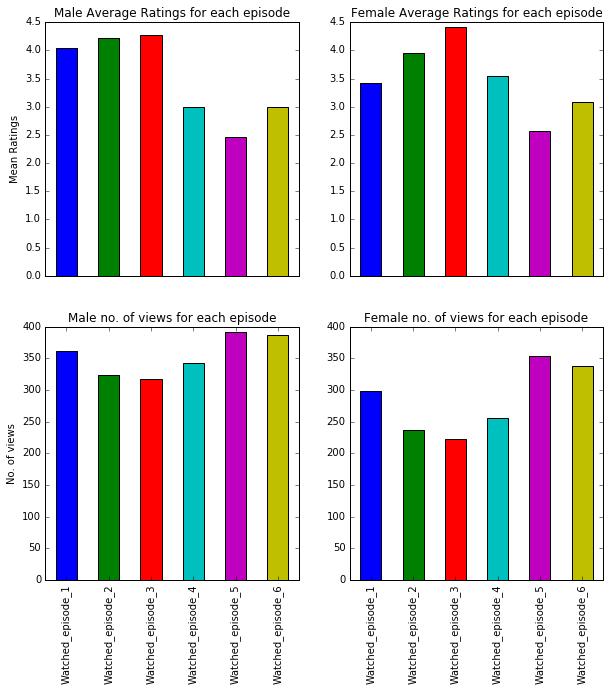

In [133]:
male = star_wars.loc[star_wars["Gender"]=="Male"]
female = star_wars.loc[star_wars["Gender"]=="Female"]

fig = plt.figure()
ax = fig.add_subplot(2,2,1)
ax = male.iloc[:,9:15].mean().plot.bar(figsize=(10,10))
ax.set_title('Male Average Ratings for each episode')
ax.yaxis.set_label_text('Mean Ratings')
ax.set_xticks([])

ax = fig.add_subplot(2,2,2)
ax = female.iloc[:,9:15].mean().plot.bar(figsize=(10,10))
ax.set_title('Female Average Ratings for each episode')
ax.set_xticks([])

ax = fig.add_subplot(2,2,3)
ax = male.iloc[:,3:9].sum().plot.bar(figsize=(10,10))
ax.set_title('Male no. of views for each episode')
ax.yaxis.set_label_text('No. of views')

ax = fig.add_subplot(2,2,4)
ax = female.iloc[:,3:9].sum().plot.bar(figsize=(10,10))
ax.set_title('Female no. of views for each episode')

Very similar trends for ratings of the episodes and num of views of each episode for both male and female except for females rating episode 4 signifcantly higher than males.

Interestingly, more males watches episodes 1-3, but males liked them far less than females did.

### 6) Determining most liked and disliked character

In [134]:
#Determining how the characters are rated:
star_wars["Han Solo"].value_counts()

Very favorably                                 610
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)    44 
Unfamiliar (N/A)                               15 
Somewhat unfavorably                           8  
Very unfavorably                               1  
Name: Han Solo, dtype: int64

Since the characters are rated on "very favourably" etc, we want to assign numerical values to each type of rating: 

1) Very favourably = 2 <br\>
2) Somehwat favourably = 1 <br\>
3) Neither favorably nor unfavorably (neutral) = 0 <br\>
4) Unfamiliar (N/A) = "nan" <br\>
5) Somwhat unfavourably = -1 <br\>
6) very unfavourably = -2<br\>

In [135]:
characters = star_wars.iloc[:,15:29]
favor = {'Very favorably': 2, 'Somewhat favorably': 1, 'Somewhat favorably': 1, 'Neither favorably nor unfavorably (neutral)': 0, 'Unfamiliar (N/A)':'NaN', 'Somewhat unfavorably': -1, 'Very unfavorably':-2}
characters = characters.replace(favor)
characters.head()

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
1,2,2,2,2,2,2,2,NaN,NaN,2,2,2,2,2
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,2,2,2,2,1,2,1,-1,2,2,2,2,2
5,2,1,1,-1,2,-2,1,0,2,1,1,-2,1,1


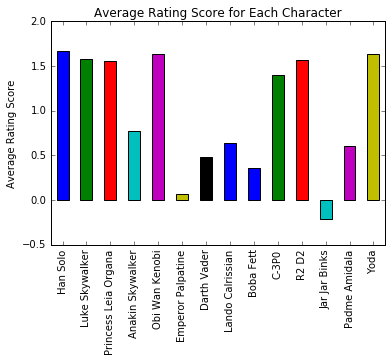

In [136]:
#Plotting mean score for ratings of characters:

import numpy as np
characterslist = characters.columns.tolist()
for x in characterslist:
    characters[x] = pd.to_numeric(characters[x], errors='coerce')
rating_mean = characters.mean()
rating_mean.plot.bar(title='Average Rating Score for Each Character')
plt.ylabel('Average Rating Score')

Best Character title goes to Han Solo with close competitors being Luke Skywalker, Princess Leia, Obi Wan, R2D2 and Yoda.  Worst Character goes to jar jar Binks.

### 7) Conclusions:

The best rated episode is episode 5 and the last 3 episodes is rated higher than the first 3 episodes regardless of gender and especially if the survey respondent is a Star Wars Fan.  This is probably owing to the popularity of the Star Wars series in the past as can be seen from the number of respondents who watched each of the episodes.  The most liked character is Han Solo whereas the most hated character is Jar Jar Binks.